## Riksdagen P1204  
version 2.2

Egenskap i Wikidata som bör bytas till GUID P8388
* [denna notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagen%20P1214.ipynb)
  * video [20201216 om denna notebook](https://youtu.be/BK7Cx0-s7Oo)
  * Phabricator [T235521](https://phabricator.wikimedia.org/T235521)
* [diskussion P1214](https://www.wikidata.org/wiki/Property_talk:P1214#Repair_needed) 
* egenskapsförslag [Wikidata:Property_proposal/Riksdagen_person_guid](https://www.wikidata.org/wiki/Wikidata:Property_proposal/Riksdagen_person_guid)
* [Riksdagensdata 1991 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=) 2020 jun
  * 2020-12-16 [2006 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2025-01-04 18:00:30.896365


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista="
r = http.request('GET', url)
data = json.loads(r.data)


In [3]:
df = pd.DataFrame(pd.DataFrame(data["personlista"]["person"]))
df.sample(4)

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
278,cef70ee6-14fa-4181-aac9-38b2f3572622,cef70ee6-14fa-4181-aac9-38b2f3572622,cef70ee6-14fa-4181-aac9-38b2f3572622,5148173,1918,man,Björk,Kaj,"Björk,Kaj",,S,Göteborgs kommun,Inga uppdrag,https://data.riksdagen.se/person/cef70ee6-14fa...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
730,9c287526-30e3-46dc-9eb7-3cc2280a4ad2,9c287526-30e3-46dc-9eb7-3cc2280a4ad2,9c287526-30e3-46dc-9eb7-3cc2280a4ad2,5148383,1916,man,Gernandt,Anders,"Gernandt,Anders",,C,Västmanlands län,Inga uppdrag,https://data.riksdagen.se/person/9c287526-30e3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
108,df49ded6-6165-46b9-915e-9db89e078589,f0cab414-7a18-48ca-b197-9c1a5523a67e,0202132308900,2342210,1943,kvinna,Andersson,Majvi,"Andersson,Majvi",,S,,Tidigare ersättare,https://data.riksdagen.se/person/f0cab414-7a18...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['ombuds..."
17,f2745219-6ee9-4e5e-9db0-e4879e91f496,d56e957c-aa80-420a-99d6-e9bd53cb80c4,0361964723211,2343536,1973,man,Agenberg,Tomas,"Agenberg,Tomas",,S,Stockholms kommun,Tidigare ersättare,https://data.riksdagen.se/person/d56e957c-aa80...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hangar_guid     2512 non-null   object
 1   sourceid        2512 non-null   object
 2   intressent_id   2512 non-null   object
 3   hangar_id       2512 non-null   object
 4   fodd_ar         2512 non-null   object
 5   kon             2512 non-null   object
 6   efternamn       2512 non-null   object
 7   tilltalsnamn    2512 non-null   object
 8   sorteringsnamn  2512 non-null   object
 9   iort            2512 non-null   object
 10  parti           2512 non-null   object
 11  valkrets        2512 non-null   object
 12  status          2512 non-null   object
 13  person_url_xml  2512 non-null   object
 14  bild_url_80     2512 non-null   object
 15  bild_url_192    2512 non-null   object
 16  bild_url_max    2512 non-null   object
 17  personuppdrag   2512 non-null   object
 18  personup

Det som skall bytas är  
* intressent_id e.g.  0758652610 
* till sourceid e.g 83345459-cc17-4d4a-b2bb-3748a0f3721c


In [5]:
#for index, row in df.iterrows(): 
#    print (row["tilltalsnamn"], " ", row["efternamn"], "|",  
#           row["intressent_id"],"|", row["sourceid"], "|" ,row["fodd_ar"], "|" ,row["parti"] )

In [6]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,2512,2512,2512,101,2,1681,853,2471,17,17,63,220,2512,2512,2512,2512,2075,2368
top,fb1d1d30-d1ac-4b9f-9d5c-2f6e83d31f45,5fa54626-81f3-4129-9bbf-cce6af7f8915,0643844865712,2343549,1943,man,Andersson,Lars,"Andersson,Arne",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/5fa54626-81f3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,
freq,1,1,1,1,59,1502,63,55,3,2495,860,735,1127,1,1,1,1,438,145


In [7]:
#df.isnull() 

In [8]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,2512,2512,2512,101,2,1681,853,2471,17,17,63,220,2512,2512,2512,2512,2075,2368
top,fb1d1d30-d1ac-4b9f-9d5c-2f6e83d31f45,5fa54626-81f3-4129-9bbf-cce6af7f8915,0643844865712,2343549,1943,man,Andersson,Lars,"Andersson,Arne",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/5fa54626-81f3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,
freq,1,1,1,1,59,1502,63,55,3,2495,860,735,1127,1,1,1,1,438,145


In [9]:
df.parti.unique()

array(['MP', 'L', 'M', 'S', 'KD', 'SD', 'FP', '-', 'C', 'PP', 'V', 'NYD',
       'BF - C', 'VPK', '', 'H - M', 'K - VPK'], dtype=object)

In [10]:
df.parti.value_counts()

parti
S          860
M          476
C          254
FP         192
MP         146
V          144
SD         135
KD         127
L           68
NYD         24
-           23
H - M       19
VPK         17
            15
BF - C       7
K - VPK      3
PP           2
Name: count, dtype: int64

In [11]:
df[df["parti"] == '-'][1:10]

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
93,2bf1ec39-4624-482b-8605-78ba0d1584d6,da0f2189-a8ae-4812-bf5b-bab23afa738b,0817420987900,2341996,1938,man,Andersson,John,"Andersson,John",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/da0f2189-a8ae...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
119,b5b961cf-bd1d-4238-b2a2-87039574a890,d7c317d9-83e4-11d4-ae60-0050040c9b55,0892012091809,2342198,1943,man,Andersson,Sten,"Andersson,Sten",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/d7c317d9-83e4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
341,cdc4320c-6742-4146-9d9a-c2b1c3ae0aec,c93800eb-8db0-44fb-acc4-868d24527a63,049679140507,2341885,1935,man,Brohult,Johan,"Brohult,Johan",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/c93800eb-8db0...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
380,5b025fbe-995b-489e-b4f5-436b9a94f960,8340e89d-250a-4300-bab5-6937399ee277,0737073162411,2343464,1970,kvinna,Carlsson Löfdahl,Emma,"Carlsson Löfdahl,Emma",,-,Jönköpings län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/8340e89d-250a...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'L', 'roll_kod': 'K...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
520,8c9a4aa9-99e8-423c-bcc6-0e051f3d65e3,6a1b02dd-bdc4-4019-ab3e-dfeb133018ed,0121939297619,2343113,1960,man,El-Haj,Jamal,"El-Haj,Jamal",,-,Malmö kommun,Tjänstgörande riksdagsledamot,https://data.riksdagen.se/person/6a1b02dd-bdc4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
631,faf50af6-b9c6-427f-92bd-58fbe0b68374,eb4a2005-9ec1-45c0-9f63-3e4ffdc4f04e,046426524512,3057163,1953,man,Felten,Olle,"Felten,Olle",,-,Södermanlands län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/eb4a2005-9ec1...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
714,74b879f9-19e4-400c-88f4-8402f3d17653,a8568101-4108-42b7-8dd6-f14665dfa9ac,0504711999229,2858135,1989,man,Gamov,Pavel,"Gamov,Pavel",,-,Skåne läns södra,Tidigare riksdagsledamot,https://data.riksdagen.se/person/a8568101-4108...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f..."
771,dc0dc4dc-1049-4894-8e18-aa1d01946a5b,1f0d91c1-605d-4b20-9825-fb8ee5373dcb,0697941234716,2369368,1964,kvinna,Gunsdotter,Margareta,"Gunsdotter,Margareta",,-,Västra Götalands läns östra,Tidigare riksdagsledamot,https://data.riksdagen.se/person/1f0d91c1-605d...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'or

In [12]:
df[df["parti"] == 'JL'] # Junilistan 

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift


In [13]:
df[df["parti"] == 'PP'] #  Piratpartiet

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
58,d1227eb7-dff4-4a95-9134-4e8bff6f622d,60f468dd-1052-49c8-bf6d-05b0e1a4dac5,0528830353520,2821456,1987,kvinna,Andersdotter,Amelia,"Andersdotter,Amelia",,PP,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/60f468dd-1052...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."
550,9df4dbf5-7579-4912-8550-ef963616f134,4af0724f-02ce-4a91-8af0-fa2154606b6f,0735009164618,2821454,1960,man,Engström,Christian,"Engström,Christian",,PP,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/4af0724f-02ce...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."


In [14]:
df[df["parti"] == 'FI'] #  FI

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift


In [15]:
df.valkrets.value_counts()

valkrets
                                                       735
Stockholms län                                         208
Stockholms kommun                                      189
Göteborgs kommun                                        99
Östergötlands län                                       78
                                                      ... 
Fyrstadskretsen 1979/80-1981/82                          1
Fyrstadskretsen 1971-1973 och\r\n1976/77-1987/79         1
Fyrstadskretsen 1971-1978/79\r\nLedamot av Andra ka      1
Fyrstadskretsen 1971-1981/82\r\n(Ledamot av Andra k      1
Fyrstadskretsen 1984/85\r\n(från 11.4.1985)              1
Name: count, Length: 63, dtype: int64

In [16]:
df.status.value_counts()

status
Tidigare riksdagsledamot         1127
Inga uppdrag                      402
Tjänstgörande riksdagsledamot     326
Tidigare ersättare                201
Tillgänglig ersättare             103
                                 ... 
Avliden  2021-08-25                 1
Avliden  2010-06-13                 1
Avliden  2017-06-24                 1
Avliden  2023-08-07                 1
Avliden  2019-06-13                 1
Name: count, Length: 220, dtype: int64

In [17]:
#for r,y in df.status.value_counts().iteritems():
#    if r.split(" ")[0] not in "Avliden" :
#        print (r,y)

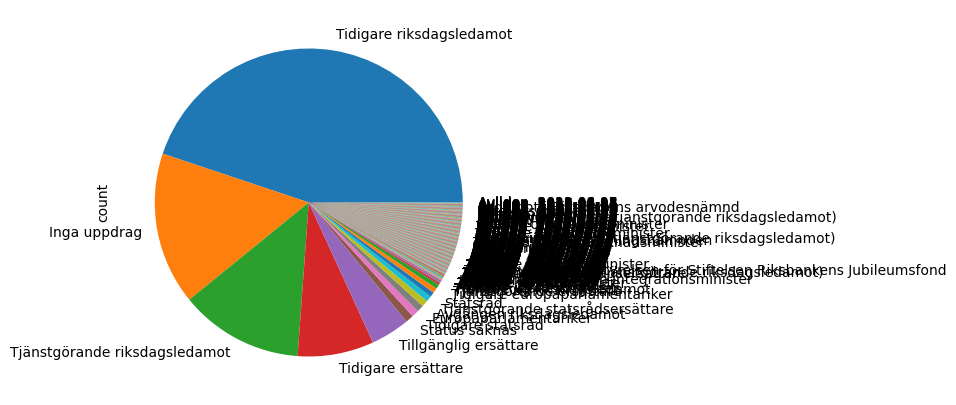

In [18]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = df["status"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.show()

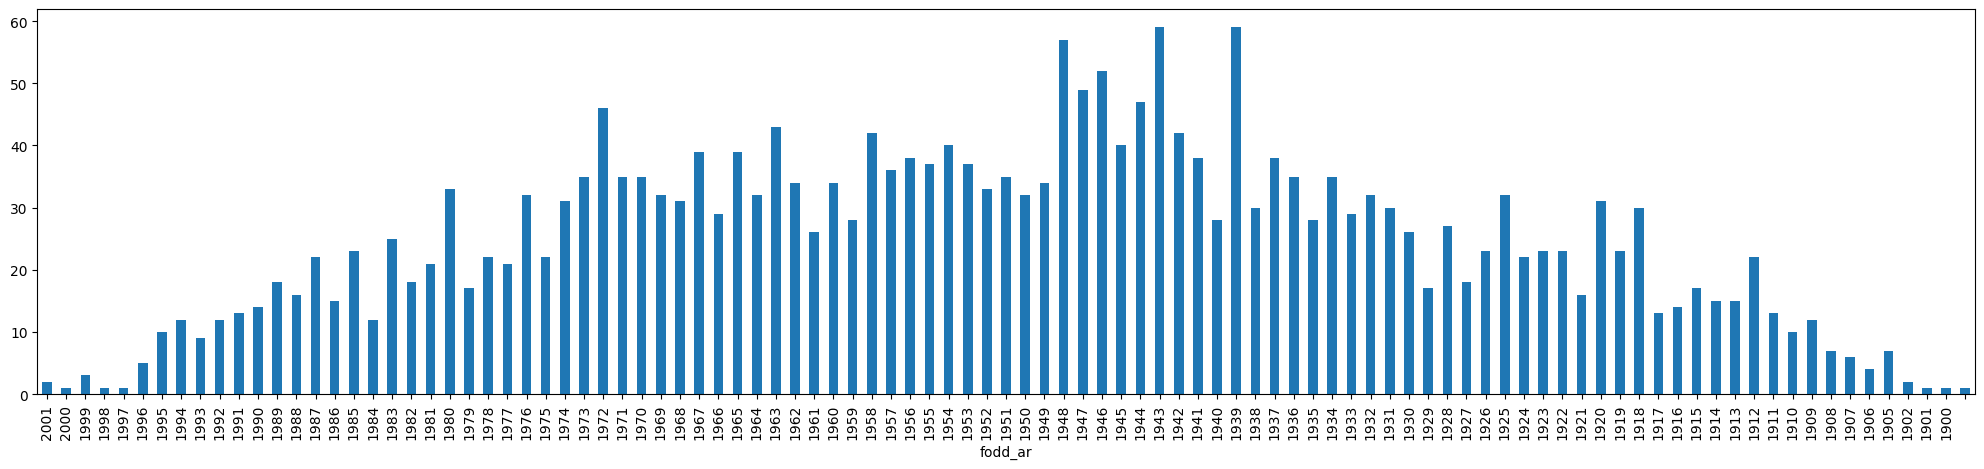

In [19]:
plot = df.fodd_ar.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.show()

In [20]:
df.iort.value_counts()

iort
               2495
Stockholm         2
Luleå             1
Helsingborg       1
Stockaryd         1
Röstånga          1
Stjärnhov         1
Simrishamn        1
Visby             1
Norrhult          1
Gamleby           1
Bengtsfors        1
Hallsberg         1
Degerhamn         1
Gislaved          1
Skellefteå        1
Göteborg          1
Name: count, dtype: int64

### Compare WD - P8388 = Riksdagen person GUID

In [21]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID  WHERE {
?item wdt:P8388 ?riksdagenGUID
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP8388 = get_sparql_dataframe(endpoint_url, queryP8388)
WDP8388["Source"] = "PropertyP8388" 

In [22]:
WDP8388.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     2463 non-null   object
 1   riksdagenGUID  2463 non-null   object
 2   Source         2463 non-null   object
dtypes: object(3)
memory usage: 57.9+ KB


In [23]:
WDP8388.sample(10)

,WikidataID,riksdagenGUID,Source
772,Q4769497,d7c32039-83e4-11d4-ae60-0050040c9b55,PropertyP8388
1114,Q118873882,03ef25cd-d2cd-4e0d-836d-e4628bdc909f/,PropertyP8388
1365,Q71054855,3c0112b7-fdd4-4f06-833b-a27c93d6efdf,PropertyP8388
1434,Q110656367,1be10c09-868c-4198-93bf-676b10f5b41a,PropertyP8388
1895,Q2091911,33ace124-43f2-4c1e-b61f-400f2261bdf0,PropertyP8388
880,Q4962937,d7c326ea-83e4-11d4-ae60-0050040c9b55,PropertyP8388
2199,Q4935873,dcc2ab7d-3fc1-4a28-b3c7-be1679c047b3,PropertyP8388
807,Q1681740,5c11ef9b-d56d-4e85-8cc6-800f0257548a,PropertyP8388
476,Q5954984,3dfc42c7-c0ee-4587-b983-c65151706797,PropertyP8388
707,Q96323621,c5cc2c67-3638-430e-bccb-a04db799a9f0,PropertyP8388


### Compare Riksdagen <-> WD 

In [24]:
#WDP1214 <-> df
mergeRiksdagenWD = pd.merge(WDP8388, df,how='outer', left_on='riksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWD.rename(columns={"_merge": "WD_Riksdagen"},inplace = True)
mergeRiksdagenWD['WD_Riksdagen'] = mergeRiksdagenWD['WD_Riksdagen'].str.replace('left_only','WD_only').str.replace('right_only','Riksdagen_only')
mergeRiksdagenWD["WD_Riksdagen"].value_counts()  
mergeRiksdagenWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WikidataID      2463 non-null   object
 1   riksdagenGUID   2463 non-null   object
 2   Source          2463 non-null   object
 3   hangar_guid     2514 non-null   object
 4   sourceid        2514 non-null   object
 5   intressent_id   2514 non-null   object
 6   hangar_id       2514 non-null   object
 7   fodd_ar         2514 non-null   object
 8   kon             2514 non-null   object
 9   efternamn       2514 non-null   object
 10  tilltalsnamn    2514 non-null   object
 11  sorteringsnamn  2514 non-null   object
 12  iort            2514 non-null   object
 13  parti           2514 non-null   object
 14  valkrets        2514 non-null   object
 15  status          2514 non-null   object
 16  person_url_xml  2514 non-null   object
 17  bild_url_80     2514 non-null   object
 18  bild_url

In [25]:
mergeRiksdagenWD["WD_Riksdagen"].value_counts() 

WD_Riksdagen
both              2403
Riksdagen_only     111
WD_only             60
Name: count, dtype: int64

In [26]:
mergeCheck = mergeRiksdagenWD[['WikidataID', 'riksdagenGUID','Source','sourceid','status','WD_Riksdagen','tilltalsnamn','efternamn','parti','fodd_ar','intressent_id']] 

In [27]:
Riksdagen_only = mergeCheck[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy() 

In [51]:
pd.set_option('display.max_rows', None) 



## Riksdagen_only

In [53]:
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 2561 to 2508
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       111 non-null    object
 4   status         111 non-null    object
 5   WD_Riksdagen   111 non-null    object
 6   tilltalsnamn   111 non-null    object
 7   efternamn      111 non-null    object
 8   parti          111 non-null    object
 9   fodd_ar        111 non-null    object
 10  intressent_id  111 non-null    object
 11  Riksdagen      111 non-null    object
dtypes: object(12)
memory usage: 11.3+ KB


In [30]:
from IPython.display import display, HTML   
Riksdagen_only["Riksdagen"] = "<a href='https://www.riksdagen.se/sv/ledamoter-partier/ledamot/_" + Riksdagen_only['sourceid'].astype(str) + "'>link</a>"
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 2463 to 2573
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       111 non-null    object
 4   status         111 non-null    object
 5   WD_Riksdagen   111 non-null    object
 6   tilltalsnamn   111 non-null    object
 7   efternamn      111 non-null    object
 8   parti          111 non-null    object
 9   fodd_ar        111 non-null    object
 10  intressent_id  111 non-null    object
 11  Riksdagen      111 non-null    object
dtypes: object(12)
memory usage: 11.3+ KB


In [31]:
#Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False])
#HTML(Riksdagen_only[{'tilltalsnamn','efternamn','parti','WikidataID','Riksdagen','fodd_ar','intressent_id'}].to_html(escape=False))
Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False]) 
HTML(Riksdagen_only[['tilltalsnamn', 'efternamn', 'parti', 'WikidataID', 'Riksdagen', 'fodd_ar', 'intressent_id','sourceid','status']].to_html(escape=False))


,tilltalsnamn,efternamn,parti,WikidataID,Riksdagen,fodd_ar,intressent_id,sourceid,status
2561,Kevin,Sahlin,SD,NaN,link,2001,0623225425598,e287ee77-0f36-4c34-9e98-3e4d3ba00551,Tillgänglig ersättare
2488,Chris,Dahlqvist,SD,NaN,link,1995,0290003389021,91a67dbc-7819-42ea-8495-938a86450a7f,Tillgänglig ersättare
2466,Sofia,Andersson Dharsani,S,NaN,link,1995,0182683003721,9a22acf3-cff8-4f92-8220-4c270ac9b912,Tillgänglig ersättare
2509,Tobias,Holmberg,V,NaN,link,1993,0566942440823,39e9a576-d293-4c4c-874a-7b19669b8597,Tillgänglig ersättare
2511,Fredrik,Hultman,M,NaN,link,1993,0664643445424,6aefcd8b-8c69-4e19-8a5e-2aab6acf84a1,Tillgänglig ersättare
2494,Andreas,Exner,SD,NaN,link,1990,0895451884323,f4edee66-311b-4d45-9193-1edc35d3c1da,Suppleant i Valprövningsnämnden
2495,Sara,Fernlund,S,NaN,link,1990,0598661102120,2afc1398-0728-496e-90de-1e4dc3549faf,Tillgänglig ersättare
2505,Joachim,Hagström,SD,NaN,link,1989,091781507226,d84f745d-f3dc-44ae-933f-7a205d8d0042,Tillgänglig ersättare
2573,Linnea,Öhman,MP,NaN,link,1987,0757810983720,3ffd9634-40fb-46a4-b4d1-87b8ab1ba0b1,Tillgänglig ersättare
2521,Isatou Aysha,Jones,V,NaN,link,1985,0639599355222,0847b796-f1f1-40c2-a6a3-ffca7237066c,Tillgänglig ersättare


In [32]:
Riksdagen_only["fodd_ar"].value_counts() 

fodd_ar
1918    12
1915    10
1917     5
1912     5
1911     5
1919     4
1916     4
1905     4
1914     4
1913     4
1930     3
1910     3
1980     3
1909     2
1967     2
1971     2
1972     2
1908     2
1953     2
1941     2
1995     2
1990     2
1926     2
1993     2
1928     2
1907     1
1906     1
1902     1
2001     1
1922     1
1964     1
1989     1
1987     1
1985     1
1982     1
1973     1
1968     1
1963     1
1923     1
1960     1
1956     1
1944     1
1931     1
1927     1
1924     1
1900     1
Name: count, dtype: int64

In [33]:
Riksdagen_only["parti"].value_counts() 

parti
S         38
C         19
FP        13
SD        11
M          9
V          5
H - M      4
BF - C     4
MP         3
L          2
           2
KD         1
Name: count, dtype: int64

In [34]:
Riksdagen_only.to_csv("Riksdagen_only.csv")

### Check WD if we have P1214 set but not P8388 GUID

In [35]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP1214 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenID  WHERE {
?item wdt:P1214 ?WDriksdagenID.
minus {?item wdt:P8388 ?riksdagenGUID}
}"""


WDP1214 = get_sparql_dataframe(endpoint_url, queryP1214)
WDP1214["Source"] = "PropertyP1214" 

In [36]:
WDP1214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     2 non-null      object
 1   WDriksdagenID  2 non-null      object
 2   Source         2 non-null      object
dtypes: object(3)
memory usage: 180.0+ bytes


In [37]:
#Merge WDP1214 with Riksdagen_only
#mergeCheckWDP214[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy()  
mergeRiksdagenWDP214 = pd.merge(WDP1214, df,how='outer', left_on='WDriksdagenID', right_on='intressent_id',indicator=True)   
mergeRiksdagenWDP214.rename(columns={"_merge": "WDP1214_Riksdagen"},inplace = True)
mergeRiksdagenWDP214['WDP1214_Riksdagen'] = mergeRiksdagenWDP214['WDP1214_Riksdagen'].str.replace('left_only','WDP1214_only').str.replace('right_only','Riksdagenintressent_id_only')
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts()  
mergeRiksdagenWDP214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   WikidataID         2 non-null      object
 1   WDriksdagenID      2 non-null      object
 2   Source             2 non-null      object
 3   hangar_guid        2512 non-null   object
 4   sourceid           2512 non-null   object
 5   intressent_id      2512 non-null   object
 6   hangar_id          2512 non-null   object
 7   fodd_ar            2512 non-null   object
 8   kon                2512 non-null   object
 9   efternamn          2512 non-null   object
 10  tilltalsnamn       2512 non-null   object
 11  sorteringsnamn     2512 non-null   object
 12  iort               2512 non-null   object
 13  parti              2512 non-null   object
 14  valkrets           2512 non-null   object
 15  status             2512 non-null   object
 16  person_url_xml     2512 non-null   object


In [38]:
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts() 

WDP1214_Riksdagen
Riksdagenintressent_id_only    2512
WDP1214_only                      2
Name: count, dtype: int64

In [39]:
Riksdagen_intressent_id_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "both"].copy() 
HTML(Riksdagen_intressent_id_only[['sourceid','tilltalsnamn','efternamn','parti','WikidataID','fodd_ar','intressent_id','WDriksdagenID','WDP1214_Riksdagen']].to_html(escape=False))


,sourceid,tilltalsnamn,efternamn,parti,WikidataID,fodd_ar,intressent_id,WDriksdagenID,WDP1214_Riksdagen


In [40]:
#create file to update Wikidata with GUID 
#This file should be empty
HTML(Riksdagen_intressent_id_only[['WikidataID','sourceid']].to_html(escape=False))


,WikidataID,sourceid


In [41]:
#Maybe should be empty. We need to ask Riksdagen if they delete people,,, if not we have errors in WD or in this Notebook
Riksdagen_intressent_wd_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "WDP1214_only"].copy() 
Riksdagen_intressent_wd_only

,WikidataID,WDriksdagenID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP1214_Riksdagen
0,Q110034198,http://www.wikidata.org/.well-known/genid/2aa7...,PropertyP1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDP1214_only
1,Q118906658,http://www.wikidata.org/.well-known/genid/9556...,PropertyP1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDP1214_only


## Check WD if we have P8388 GUID set but not old P1214 
* as old documents use P1214 its make sense to have both
* new created records seems to lack P1214 at Riksdagen

In [42]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388miss = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenGUID  WHERE {
?item wdt:P8388 ?WDriksdagenGUID.
minus {?item wdt:P1214 ?riksdagenID}
}"""


WDP8388_miss = get_sparql_dataframe(endpoint_url, queryP8388miss)
WDP8388_miss["Source"] = "Property8388" 

In [43]:
WDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   WikidataID       405 non-null    object
 1   WDriksdagenGUID  405 non-null    object
 2   Source           405 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB


In [44]:
# merge WDP8388_miss WDriksdagenGUID with  
mergeRiksdagenWDP8388_miss = pd.merge(WDP8388_miss, df,how='outer', left_on='WDriksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWDP8388_miss.rename(columns={"_merge": "WDP8388_miss_Riksdagen"},inplace = True)
mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'] = mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'].str.replace('left_only','WDP8388_miss_Riksdagen_only').str.replace('right_only','Riksdagensourceid_only')
mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"].value_counts()  

WDP8388_miss_Riksdagen
Riksdagensourceid_only         2166
both                            346
WDP8388_miss_Riksdagen_only      59
Name: count, dtype: int64

In [45]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              405 non-null    object
 1   WDriksdagenGUID         405 non-null    object
 2   Source                  405 non-null    object
 3   hangar_guid             2512 non-null   object
 4   sourceid                2512 non-null   object
 5   intressent_id           2512 non-null   object
 6   hangar_id               2512 non-null   object
 7   fodd_ar                 2512 non-null   object
 8   kon                     2512 non-null   object
 9   efternamn               2512 non-null   object
 10  tilltalsnamn            2512 non-null   object
 11  sorteringsnamn          2512 non-null   object
 12  iort                    2512 non-null   object
 13  parti                   2512 non-null   object
 14  valkrets                2512 non-null   object
 15  stat

In [46]:
WD_P8388_only = mergeRiksdagenWDP8388_miss[mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"] == "both"].copy() 
# TO DO filter only records with intressent_id ==> those wD records should get P1214
HTML(WD_P8388_only[['WikidataID','intressent_id','sourceid']].to_html(escape=False))
WD_P8388_only

,WikidataID,WDriksdagenGUID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP8388_miss_Riksdagen
0,Q131382039,820d6a20-1170-4915-bdff-e6175011bf0b,Property8388,1413fff7-a132-43d6-bba1-6d530064bdc5,820d6a20-1170-4915-bdff-e6175011bf0b,0109529900621,5146616,1985,kvinna,Kronvall,Andrea,"Kronvall,Andrea",,SD,Stockholms län,Status saknas,https://data.riksdagen.se/person/820d6a20-1170...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RB', 'roll_kod': '...",,both
1,Q53707,204000e5-66a1-42ce-acbf-966474801138,Property8388,204000e5-66a1-42ce-acbf-966474801138,204000e5-66a1-42ce-acbf-966474801138,204000e5-66a1-42ce-acbf-966474801138,5148177,1901,man,Erlander,Tage,"Erlander,Tage",,S,Göteborgs kommun,Inga uppdrag,https://data.riksdagen.se/person/204000e5-66a1...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
2,Q53713,86ff6652-5de5-4686-8757-70da310687bc,Property8388,86ff6652-5de5-4686-8757-70da310687bc,86ff6652-5de5-4686-8757-70da310687bc,86ff6652-5de5-4686-8757-70da310687bc,5148093,1927,man,Palme,Olof,"Palme,Olof",,S,Stockholms kommun,Inga uppdrag,https://data.riksdagen.se/person/86ff6652-5de5...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
3,Q53721,23fda174-e940-4cd1-961f-620307edc6d4,Property8388,23fda174-e940-4cd1-961f-620307edc6d4,23fda174-e940-4cd1-961f-620307edc6d4,23fda174-e940-4cd1-961f-620307edc6d4,5147895,1926,man,Fälldin,Thorbjörn,"Fälldin,Thorbjörn",,C,Västernorrlands län,Inga uppdrag,https://data.riksdagen.se/person/23fda174-e940...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
4,Q53733,85283550-b02f-4483-8490-a70cae639f41,Property8388,85283550-b02f-4483-8490-a70cae639f41,85283550-b02f-4483-8490-a70cae639f41,85283550-b02f-4483-8490-a70cae639f41,5148107,1931,man,Ullsten,Ola,"Ullsten,Ola",,FP,Stockholms kommun,Inga uppdrag,https://data.riksdagen.se/person/85283550-b02f...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
5,Q5573908,7a8563ee-104e-4518-a921-ec17c3a442e0,Property8388,7a8563ee-104e-4518-a921-ec17c3a442e0,7a8563ee-104e-4518-a921-ec17c3a442e0,7a8563ee-104e-4518-a921-ec17c3a442e0,5148229,1905,man,Berndtsson,Henry,"Berndtsson,Henry",,FP,Bohuslän,Inga uppdrag,https://data.riksdagen.se/person/7a8563ee-104e...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
6,Q5576993,43be0c2f-bc3f-4c58-8532-e38dfa33dbcd,Property8388,43be0c2f-bc3f-4c58-8532-e38dfa33dbcd,43be0c2f-bc3f-4c58-8532-e38dfa33dbcd,43be0c2f-bc3f-4c58-8532-e38dfa33dbcd,5148401,1916,man,Biörck,Gunnar,"Biörck,Gunnar",,M,Stockholms län,Inga uppdrag,https://data.riksdagen.se/person/43be0c2f-bc3f...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
7,Q5579584,4ce9e150-0c75-43a6-979b-e26fdbee1446,Property8388,4ce9e150-0c75-43a6-979b-e26fdbee1446,4ce9e150-0c75-43a6-979b-e26fdbee1446,4ce9e150-0c75-43a6-979b-e26fdbee1446,5148295,1914,man,Blomkvist,Arn

In [47]:
WD_P8388_only[WD_P8388_only["kon"] =="kvinna"]

,WikidataID,WDriksdagenGUID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP8388_miss_Riksdagen
0,Q131382039,820d6a20-1170-4915-bdff-e6175011bf0b,Property8388,1413fff7-a132-43d6-bba1-6d530064bdc5,820d6a20-1170-4915-bdff-e6175011bf0b,0109529900621,5146616,1985,kvinna,Kronvall,Andrea,"Kronvall,Andrea",,SD,Stockholms län,Status saknas,https://data.riksdagen.se/person/820d6a20-1170...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RB', 'roll_kod': '...",,both
111,Q96982284,ec011dd7-0bdf-4094-9e6a-5e490ad42711,Property8388,ec011dd7-0bdf-4094-9e6a-5e490ad42711,ec011dd7-0bdf-4094-9e6a-5e490ad42711,ec011dd7-0bdf-4094-9e6a-5e490ad42711,5148663,1913,kvinna,Olsson,Alma,"Olsson,Alma",,C,Fyrstadskretsen 1971-1975/76,Inga uppdrag,https://data.riksdagen.se/person/ec011dd7-0bdf...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
115,Q96982763,dbab054e-2f95-45d8-a0e4-f807855384c6,Property8388,dbab054e-2f95-45d8-a0e4-f807855384c6,dbab054e-2f95-45d8-a0e4-f807855384c6,dbab054e-2f95-45d8-a0e4-f807855384c6,5148289,1914,kvinna,Pehrsson,Maj,"Pehrsson,Maj",,C,Älvsborgs läns södr,Inga uppdrag,https://data.riksdagen.se/person/dbab054e-2f95...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
121,Q96983918,63ca497f-df13-46f2-b038-95a79e8f54f5,Property8388,63ca497f-df13-46f2-b038-95a79e8f54f5,63ca497f-df13-46f2-b038-95a79e8f54f5,63ca497f-df13-46f2-b038-95a79e8f54f5,5148337,1925,kvinna,Nilsson,Elvy,"Nilsson,Elvy",,S,Värmlands län,Inga uppdrag,https://data.riksdagen.se/person/63ca497f-df13...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
126,Q97013061,5ed90e36-8b56-4db1-b06c-e4e93dcc9d73,Property8388,5ed90e36-8b56-4db1-b06c-e4e93dcc9d73,5ed90e36-8b56-4db1-b06c-e4e93dcc9d73,5ed90e36-8b56-4db1-b06c-e4e93dcc9d73,5147941,1918,kvinna,Wigenfeldt,Britt,"Wigenfeldt,Britt",,C,Uppsala län,Inga uppdrag,https://data.riksdagen.se/person/5ed90e36-8b56...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
127,Q97013076,99a49726-f504-4f0e-91d7-2a0916977289,Property8388,99a49726-f504-4f0e-91d7-2a0916977289,99a49726-f504-4f0e-91d7-2a0916977289,99a49726-f504-4f0e-91d7-2a0916977289,5148615,1928,kvinna,Ekelund,Ulla,"Ekelund,Ulla",,C,Kristianstads län,Inga uppdrag,https://data.riksdagen.se/person/99a49726-f504...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
128,Q97013129,59516a98-aaa4-4f34-9021-8fada40288f7,Property8388,59516a98-aaa4-4f34-9021-8fada40288f7,59516a98-aaa4-4f34-9021-8fada40288f7,59516a98-aaa4-4f34-9021-8fada40288f7,5148685,1912,kvinna,Fredgardh,Sonja,"Fredgardh,Sonja",,C,Malmöhus län,Inga uppdrag,https://data.riksdagen.se/person/59516a98-aaa4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
129,Q97013163,9a19b5e8-dd86-4d85-b069-c8e95d72e862,Property8388,9a19b5e8-dd86-4d85-b069-c8e95d72e862,9a19b5e8-dd86-4d85-b069-c8e95d72e862,9a19b5e8-dd86-4d8

In [48]:
WD_P8388_only["intressent_id"].str

In [49]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              405 non-null    object
 1   WDriksdagenGUID         405 non-null    object
 2   Source                  405 non-null    object
 3   hangar_guid             2512 non-null   object
 4   sourceid                2512 non-null   object
 5   intressent_id           2512 non-null   object
 6   hangar_id               2512 non-null   object
 7   fodd_ar                 2512 non-null   object
 8   kon                     2512 non-null   object
 9   efternamn               2512 non-null   object
 10  tilltalsnamn            2512 non-null   object
 11  sorteringsnamn          2512 non-null   object
 12  iort                    2512 non-null   object
 13  parti                   2512 non-null   object
 14  valkrets                2512 non-null   object
 15  stat

In [50]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2025-01-04 18:00:45.765250
Time elapsed (hh:mm:ss.ms) 0:00:14.868934
